In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
wa = pd.read_csv("/content/WC_AT.csv",encoding = 'latin2')
wa

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [3]:
wa.head(11)

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
5,71.85,21.68
6,80.90,29.08
7,83.40,32.98
8,63.50,11.44
9,73.20,32.22


In [4]:
wa.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
104,False
105,False
106,False
107,False


In [5]:
wa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [6]:
wa.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


In [7]:
wa.isnull()

,Waist,AT
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
104,False,False
105,False,False
106,False,False
107,False,False


In [8]:
wa.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


In [9]:
import statsmodels.formula.api as smf

In [10]:
model = smf.ols("AT ~ Waist", data=wa).fit()
model

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Tue, 04 Nov 2025   Prob (F-statistic):           1.62e-27
Time:                        11:34:43   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
model.rsquared, model.rsquared_adj

(np.float64(0.670036893052843), np.float64(0.6669531256981966))

In [13]:
model.tvalues, model.pvalues

(Intercept    -9.909103
 Waist        14.740376
 dtype: float64,
 Intercept    8.197416e-17
 Waist        1.618607e-27
 dtype: float64)

In [14]:
slr_c = smf.ols('AT~Waist',data=wa).fit()
slr_c.tvalues , slr_c.pvalues

(Intercept    -9.909103
 Waist        14.740376
 dtype: float64,
 Intercept    8.197416e-17
 Waist        1.618607e-27
 dtype: float64)

In [16]:
slr_c = smf.ols('Waist~AT',data=wa).fit()
slr_c.tvalues , slr_c.pvalues

(Intercept    47.025363
 AT           14.740376
 dtype: float64,
 Intercept    2.697170e-73
 AT           1.618607e-27
 dtype: float64)

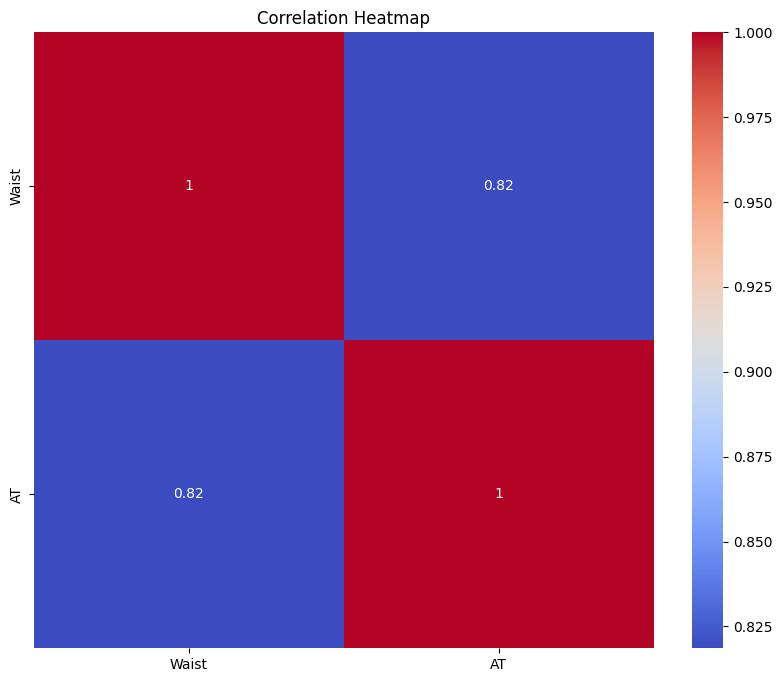

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(wa.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()